In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30


In [5]:
train = pd.read_csv("./dataset/train.csv")
test = pd.read_csv('./dataset/test.csv')
submission = pd.read_csv("./dataset/sample_submission.csv")

In [6]:
train.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        151 non-null    int64  
 1   age       151 non-null    int64  
 2   sex       151 non-null    int64  
 3   cp        151 non-null    int64  
 4   trestbps  151 non-null    int64  
 5   chol      151 non-null    int64  
 6   fbs       151 non-null    int64  
 7   restecg   151 non-null    int64  
 8   thalach   151 non-null    int64  
 9   exang     151 non-null    int64  
 10  oldpeak   151 non-null    float64
 11  slope     151 non-null    int64  
 12  ca        151 non-null    int64  
 13  thal      151 non-null    int64  
 14  target    151 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 17.8 KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        152 non-null    int64  
 1   age       152 non-null    int64  
 2   sex       152 non-null    int64  
 3   cp        152 non-null    int64  
 4   trestbps  152 non-null    int64  
 5   chol      152 non-null    int64  
 6   fbs       152 non-null    int64  
 7   restecg   152 non-null    int64  
 8   thalach   152 non-null    int64  
 9   exang     152 non-null    int64  
 10  oldpeak   152 non-null    float64
 11  slope     152 non-null    int64  
 12  ca        152 non-null    int64  
 13  thal      152 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 16.8 KB


In [11]:
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,43.734045,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,1.000000,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,76.000000,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,113.500000,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,151.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


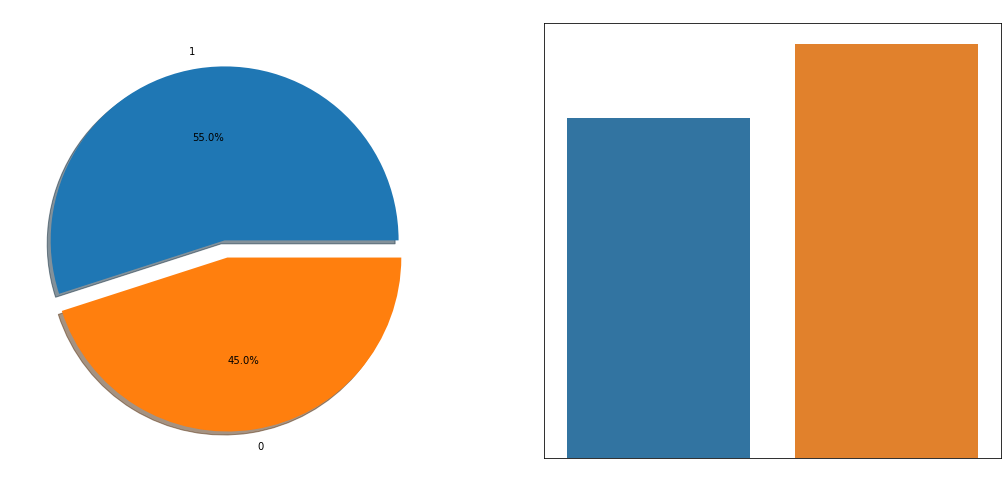

In [36]:
fig,ax = plt.subplots(1,2,figsize = (18,8))
train["target"].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)

ax[0].set_title("Target")
ax[0].set_ylabel("")

sns.countplot("target", data = train, ax = ax[1])
ax[1].set_title("Target")
plt.show()

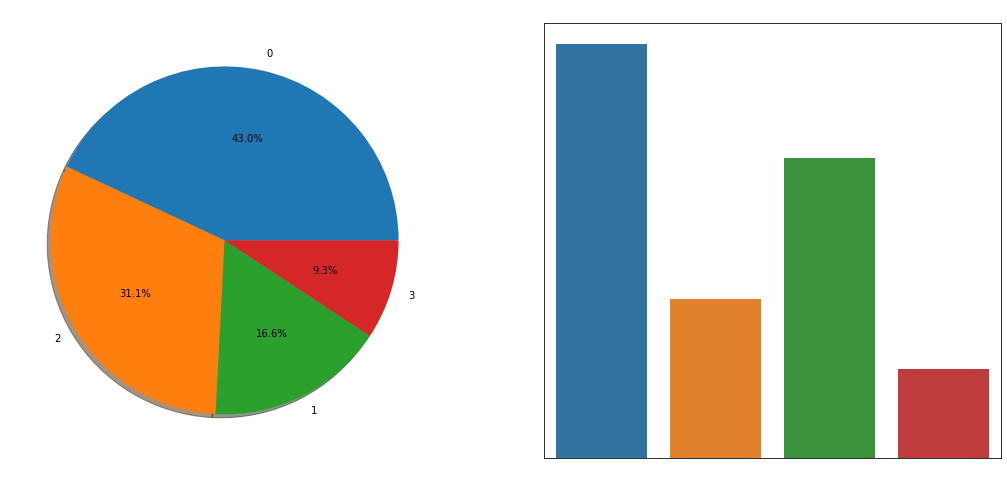

In [43]:
fig, ax = plt.subplots(1,2, figsize = (18,8))
train["cp"].value_counts().plot.pie(shadow = True, autopct = "%1.1f%%", ax = ax[0])

ax[0].set_title("cp")
ax[0].set_ylabel("")

sns.countplot("cp", data = train, ax = ax[1])
ax[1].set_title("cp")
plt.show()

In [46]:
train.groupby(["cp","target"])["target"].count()

cp  target
0   0         48
    1         17
1   0          7
    1         18
2   0          8
    1         39
3   0          5
    1          9
Name: target, dtype: int64

In [47]:
train[["cp","target"]].groupby(["cp"]).mean()

,target
cp,
0,0.261538
1,0.720000
2,0.829787
3,0.642857


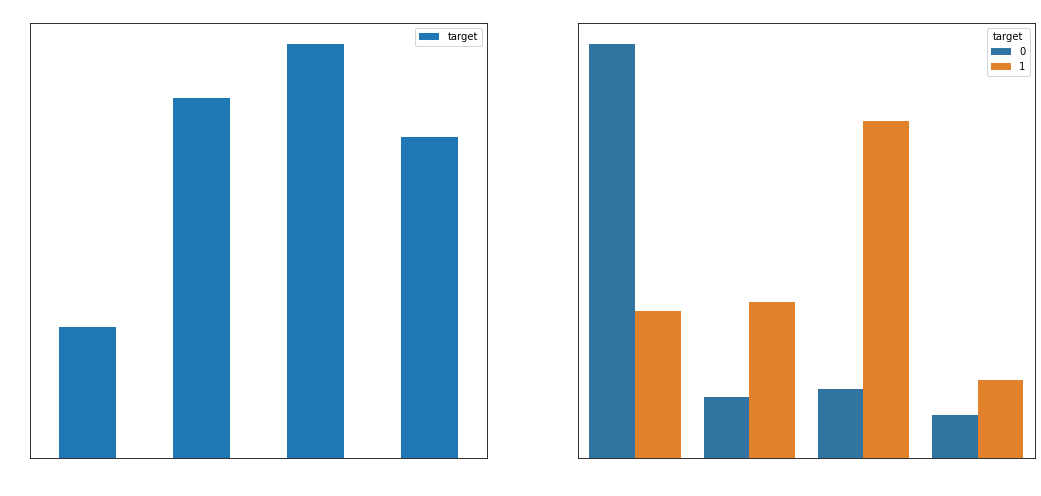

In [52]:
fig, ax = plt.subplots(1,2, figsize = (18,8))
train[["cp", "target"]].groupby(["cp"]).mean().plot.bar(ax=ax[0],rot = 0)
ax[0].set_title("cp VS target")

sns.countplot("cp", hue = "target", data = train, ax = ax[1])
ax[1].set_title("cp : Disease VS Not Disease")
plt.show()

In [60]:
pd.crosstab(train.sex, train.target,margins = True).style.background_gradient(cmap="summer_r")

target,0,1,All
sex,,,
0,13,35,48
1,55,48,103
All,68,83,151


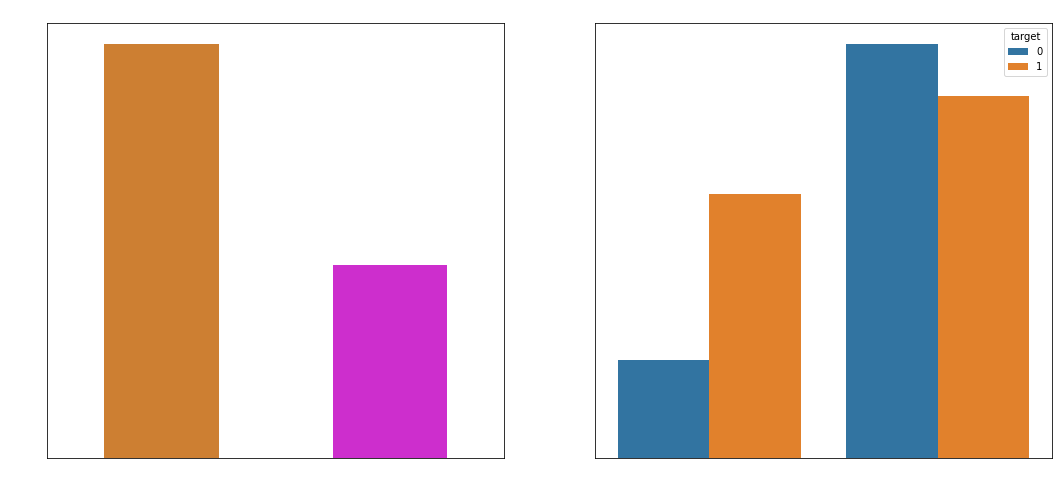

In [73]:
fig,ax = plt.subplots(1,2,figsize =(18,8))
train.sex.value_counts().plot.bar(color = ['#CD7F32', '#CD2ECD', '#D31232'],ax = ax[0],rot = 0)
ax[0].set_title('Number of people by sex')
ax[0].set_ylabel('Count')

sns.countplot("sex", data = train, hue = "target", ax = ax[1])
ax[1].set_title("sex : Disease VS Not Disease")
plt.show()

In [80]:
pd.crosstab([train.sex, train.target], train.cp, margins=True).style.background_gradient(cmap='summer_r')

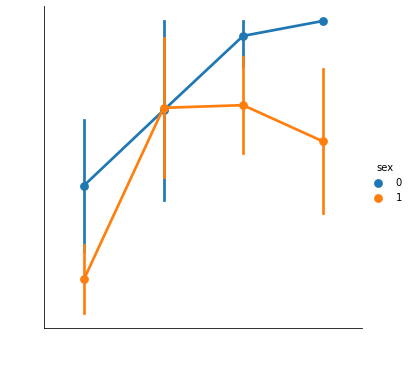

In [81]:
sns.factorplot("cp", "target", hue = "sex", data = train)

In [82]:
train["age"].describeibe()

count    151.000000
mean      54.496689
std        8.904586
min       34.000000
25%       48.500000
50%       54.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Text(0, 0.5, 'count')

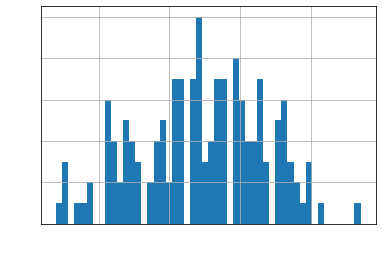

In [85]:
train["age"].hist(bins = 50)
plt.xlabel("age")
plt.ylabel("count")

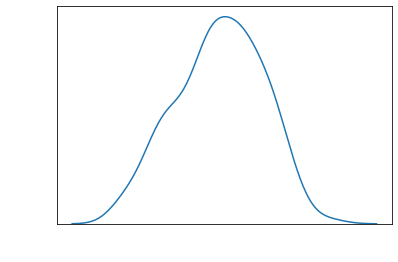

In [86]:
sns.kdeplot(train["age"])

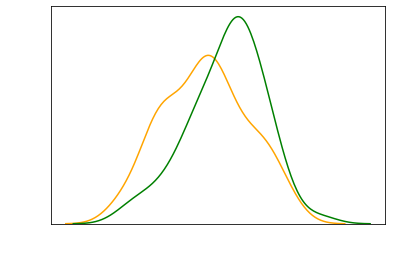

In [89]:
sns.kdeplot(train.loc[train["target"] == 1, "age"], color = "orange")
sns.kdeplot(train.loc[train["target"] == 0, "age"], color = "green")

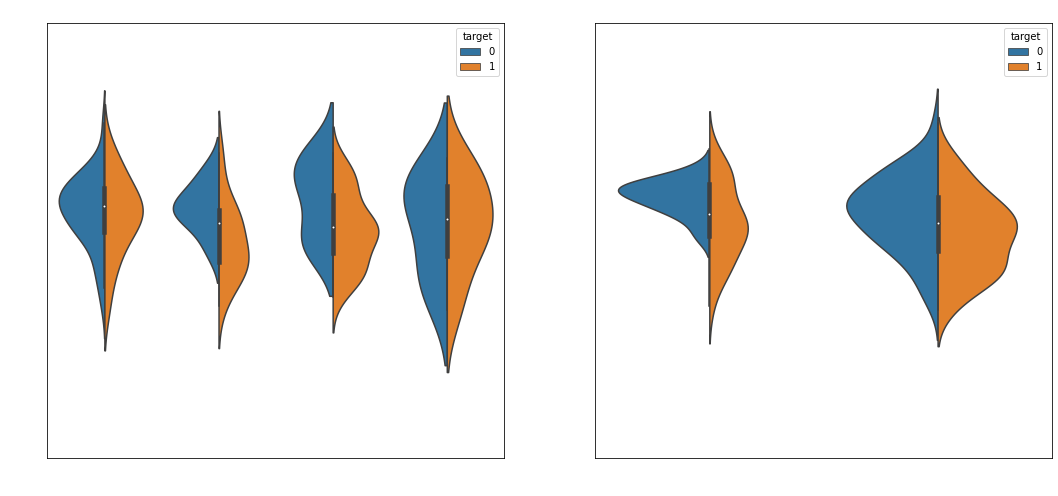

In [95]:
fig, ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot("cp", "age", hue = "target", data = train, split = True, ax = ax[0])
ax[0].set_title('cp and age VS target')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('sex', 'age', hue='target', data=train, split=True, ax=ax[1])
ax[1].set_title('sex and age VS target')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

In [96]:
# importing all the required ML packages
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [97]:
train.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [98]:
train_sub, valid = train_test_split(train, test_size=0.2, random_state = 2021, stratify=train["target"])

In [100]:
train_sub.head(3)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,49,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
104,105,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
145,146,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1


In [101]:
valid.head(3)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
99,100,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
64,65,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
18,19,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0


In [114]:
train_X = train_sub[train_sub.columns[1:-1]] 
train_Y = train_sub[train_sub.columns[-1]]
valid_X = valid[valid.columns[1:-1]]
valid_Y = valid[valid.columns[-1]]

In [116]:
X = train[train.columns[1:-1]]
Y = train["target"]

In [118]:
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,53,1,2,130,197,1,0,152,0,1.2,0,0,2
1,52,1,3,152,298,1,1,178,0,1.2,1,0,3
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3


In [123]:
Y.head(3)

0    1
1    1
2    0
Name: target, dtype: int64

In [125]:
train_sub["target"].value_counts() / train_sub.shape[0]

1    0.55
0    0.45
Name: target, dtype: float64

In [127]:
valid["target"].value_counts() / valid.shape[0]

1    0.548387
0    0.451613
Name: target, dtype: float64

In [128]:
train["target"].value_counts() / train.shape[0]

1    0.549669
0    0.450331
Name: target, dtype: float64

In [130]:
model1 = LogisticRegression()
model1.fit(train_X, train_Y)

LogisticRegression()

In [131]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred1 = (model1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred1)
    print(temp_thres, 'f1_score of LogisticRegression is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of LogisticRegression is 70.83%
0.01 f1_score of LogisticRegression is 77.27%
0.02 f1_score of LogisticRegression is 79.07%
0.03 f1_score of LogisticRegression is 80.95%
0.04 f1_score of LogisticRegression is 80.95%
0.05 f1_score of LogisticRegression is 80.95%
0.06 f1_score of LogisticRegression is 80.95%
0.07 f1_score of LogisticRegression is 80.95%
0.08 f1_score of LogisticRegression is 82.93%
0.09 f1_score of LogisticRegression is 82.93%
0.1 f1_score of LogisticRegression is 82.93%
0.11 f1_score of LogisticRegression is 82.93%
0.12 f1_score of LogisticRegression is 82.93%
0.13 f1_score of LogisticRegression is 87.18%
0.14 f1_score of LogisticRegression is 87.18%
0.15 f1_score of LogisticRegression is 87.18%
0.16 f1_score of LogisticRegression is 87.18%
0.17 f1_score of LogisticRegression is 87.18%
0.18 f1_score of LogisticRegression is 87.18%
0.19 f1_score of LogisticRegression is 87.18%
0.2 f1_score of LogisticRegression is 87.18%
0.21 f1_score of LogisticRegression i

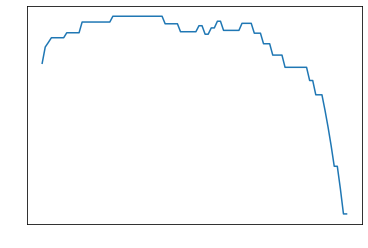

In [136]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

In [137]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

89.47368421052632
23


In [138]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred1 = (model1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred1, valid_Y)
    print(temp_thres, 'Accuracy of LogisticRegression is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of LogisticRegression is 54.84%
0.01 Accuracy of LogisticRegression is 67.74%
0.02 Accuracy of LogisticRegression is 70.97%
0.03 Accuracy of LogisticRegression is 74.19%
0.04 Accuracy of LogisticRegression is 74.19%
0.05 Accuracy of LogisticRegression is 74.19%
0.06 Accuracy of LogisticRegression is 74.19%
0.07 Accuracy of LogisticRegression is 74.19%
0.08 Accuracy of LogisticRegression is 77.42%
0.09 Accuracy of LogisticRegression is 77.42%
0.1 Accuracy of LogisticRegression is 77.42%
0.11 Accuracy of LogisticRegression is 77.42%
0.12 Accuracy of LogisticRegression is 77.42%
0.13 Accuracy of LogisticRegression is 83.87%
0.14 Accuracy of LogisticRegression is 83.87%
0.15 Accuracy of LogisticRegression is 83.87%
0.16 Accuracy of LogisticRegression is 83.87%
0.17 Accuracy of LogisticRegression is 83.87%
0.18 Accuracy of LogisticRegression is 83.87%
0.19 Accuracy of LogisticRegression is 83.87%
0.2 Accuracy of LogisticRegression is 83.87%
0.21 Accuracy of LogisticRegression i

Text(0, 0.5, 'accuracy score')

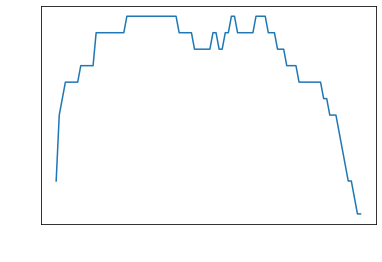

In [139]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [140]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

87.09677419354838
23


In [141]:
model1.fit(X, Y)

LogisticRegression()

In [142]:
test.drop('id', axis=1, inplace=True)

In [143]:
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [156]:
model1.predict_proba(test)[:,1]

array([2.17445761e-01, 8.72943347e-01, 5.71997980e-01, 1.17541030e-02,
       9.23697551e-01, 9.17872860e-01, 6.59860498e-01, 3.66144830e-04,
       3.68607970e-03, 5.78907100e-01, 8.42006910e-01, 1.38494468e-01,
       9.59416854e-01, 2.36143888e-02, 9.73663230e-01, 9.74394419e-01,
       9.66043034e-01, 1.55943340e-02, 2.25569793e-03, 9.41004929e-03,
       8.02785558e-01, 2.17982186e-02, 1.78733918e-01, 5.09577199e-01,
       8.42392052e-01, 5.33250264e-01, 9.67959962e-01, 8.22604449e-01,
       1.05021778e-03, 9.07766639e-01, 2.48219310e-02, 1.85385774e-02,
       1.78563168e-03, 1.40695605e-01, 7.44417446e-01, 3.58767590e-02,
       8.24787808e-01, 7.48170096e-01, 8.52593884e-01, 8.96524323e-01,
       7.51511172e-02, 8.95097013e-01, 8.90156077e-01, 8.05834578e-01,
       8.19463204e-01, 4.50608360e-04, 9.42461285e-01, 9.60711182e-01,
       4.40114009e-02, 2.43222040e-02, 2.48113227e-02, 2.42030363e-03,
       9.21609548e-01, 9.67824231e-01, 7.23577477e-02, 3.54008704e-05,
      

In [179]:
real_pred1 = (model1.predict_proba(test)[:,1] > 0.23).astype(int)

In [180]:
real_pred1

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [182]:
model1_1 = LogisticRegression(solver='liblinear', n_jobs=-1, random_state=2021)
model1_1.fit(train_X, train_Y)

LogisticRegression(n_jobs=-1, random_state=2021, solver='liblinear')

In [183]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred1_1 = (model1_1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred1_1)
    print(temp_thres, 'f1_score of LogisticRegression2 is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of LogisticRegression2 is 70.83%
0.01 f1_score of LogisticRegression2 is 77.27%
0.02 f1_score of LogisticRegression2 is 79.07%
0.03 f1_score of LogisticRegression2 is 80.95%
0.04 f1_score of LogisticRegression2 is 80.95%
0.05 f1_score of LogisticRegression2 is 80.95%
0.06 f1_score of LogisticRegression2 is 80.95%
0.07 f1_score of LogisticRegression2 is 82.93%
0.08 f1_score of LogisticRegression2 is 82.93%
0.09 f1_score of LogisticRegression2 is 82.93%
0.1 f1_score of LogisticRegression2 is 82.93%
0.11 f1_score of LogisticRegression2 is 82.93%
0.12 f1_score of LogisticRegression2 is 85.00%
0.13 f1_score of LogisticRegression2 is 87.18%
0.14 f1_score of LogisticRegression2 is 87.18%
0.15 f1_score of LogisticRegression2 is 87.18%
0.16 f1_score of LogisticRegression2 is 87.18%
0.17 f1_score of LogisticRegression2 is 87.18%
0.18 f1_score of LogisticRegression2 is 87.18%
0.19 f1_score of LogisticRegression2 is 87.18%
0.2 f1_score of LogisticRegression2 is 87.18%
0.21 f1_score of

Text(0, 0.5, 'f1 score')

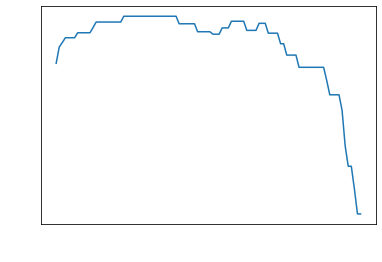

In [184]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [185]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

89.47368421052632
22


In [186]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred1_1 = (model1_1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred1_1, valid_Y)
    print(temp_thres, 'Accuracy of LogisticRegression2 is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of LogisticRegression2 is 54.84%
0.01 Accuracy of LogisticRegression2 is 67.74%
0.02 Accuracy of LogisticRegression2 is 70.97%
0.03 Accuracy of LogisticRegression2 is 74.19%
0.04 Accuracy of LogisticRegression2 is 74.19%
0.05 Accuracy of LogisticRegression2 is 74.19%
0.06 Accuracy of LogisticRegression2 is 74.19%
0.07 Accuracy of LogisticRegression2 is 77.42%
0.08 Accuracy of LogisticRegression2 is 77.42%
0.09 Accuracy of LogisticRegression2 is 77.42%
0.1 Accuracy of LogisticRegression2 is 77.42%
0.11 Accuracy of LogisticRegression2 is 77.42%
0.12 Accuracy of LogisticRegression2 is 80.65%
0.13 Accuracy of LogisticRegression2 is 83.87%
0.14 Accuracy of LogisticRegression2 is 83.87%
0.15 Accuracy of LogisticRegression2 is 83.87%
0.16 Accuracy of LogisticRegression2 is 83.87%
0.17 Accuracy of LogisticRegression2 is 83.87%
0.18 Accuracy of LogisticRegression2 is 83.87%
0.19 Accuracy of LogisticRegression2 is 83.87%
0.2 Accuracy of LogisticRegression2 is 83.87%
0.21 Accuracy of

Text(0, 0.5, 'accuracy score')

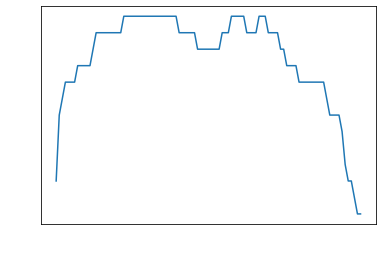

In [187]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [188]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

87.09677419354838
22


In [189]:
model1.fit(X, Y)

LogisticRegression()

In [192]:
real_pred1 = (model1.predict_proba(test)[:,1] > 0.23).astype(int)

In [193]:
submission['target'] = real_pred1
submission.to_csv('submission1.csv', index=False)

In [194]:
model1_1 = LogisticRegression(solver='liblinear', n_jobs=-1, random_state=2021)
model1_1.fit(train_X, train_Y)

LogisticRegression(n_jobs=-1, random_state=2021, solver='liblinear')

In [195]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred1_1 = (model1_1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred1_1)
    print(temp_thres, 'f1_score of LogisticRegression2 is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of LogisticRegression2 is 70.83%
0.01 f1_score of LogisticRegression2 is 77.27%
0.02 f1_score of LogisticRegression2 is 79.07%
0.03 f1_score of LogisticRegression2 is 80.95%
0.04 f1_score of LogisticRegression2 is 80.95%
0.05 f1_score of LogisticRegression2 is 80.95%
0.06 f1_score of LogisticRegression2 is 80.95%
0.07 f1_score of LogisticRegression2 is 82.93%
0.08 f1_score of LogisticRegression2 is 82.93%
0.09 f1_score of LogisticRegression2 is 82.93%
0.1 f1_score of LogisticRegression2 is 82.93%
0.11 f1_score of LogisticRegression2 is 82.93%
0.12 f1_score of LogisticRegression2 is 85.00%
0.13 f1_score of LogisticRegression2 is 87.18%
0.14 f1_score of LogisticRegression2 is 87.18%
0.15 f1_score of LogisticRegression2 is 87.18%
0.16 f1_score of LogisticRegression2 is 87.18%
0.17 f1_score of LogisticRegression2 is 87.18%
0.18 f1_score of LogisticRegression2 is 87.18%
0.19 f1_score of LogisticRegression2 is 87.18%
0.2 f1_score of LogisticRegression2 is 87.18%
0.21 f1_score of

Text(0, 0.5, 'f1 score')

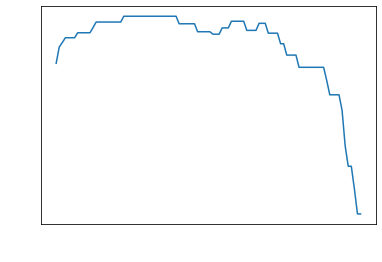

In [196]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [197]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

89.47368421052632
22


In [198]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred1_1 = (model1_1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred1_1, valid_Y)
    print(temp_thres, 'Accuracy of LogisticRegression2 is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of LogisticRegression2 is 54.84%
0.01 Accuracy of LogisticRegression2 is 67.74%
0.02 Accuracy of LogisticRegression2 is 70.97%
0.03 Accuracy of LogisticRegression2 is 74.19%
0.04 Accuracy of LogisticRegression2 is 74.19%
0.05 Accuracy of LogisticRegression2 is 74.19%
0.06 Accuracy of LogisticRegression2 is 74.19%
0.07 Accuracy of LogisticRegression2 is 77.42%
0.08 Accuracy of LogisticRegression2 is 77.42%
0.09 Accuracy of LogisticRegression2 is 77.42%
0.1 Accuracy of LogisticRegression2 is 77.42%
0.11 Accuracy of LogisticRegression2 is 77.42%
0.12 Accuracy of LogisticRegression2 is 80.65%
0.13 Accuracy of LogisticRegression2 is 83.87%
0.14 Accuracy of LogisticRegression2 is 83.87%
0.15 Accuracy of LogisticRegression2 is 83.87%
0.16 Accuracy of LogisticRegression2 is 83.87%
0.17 Accuracy of LogisticRegression2 is 83.87%
0.18 Accuracy of LogisticRegression2 is 83.87%
0.19 Accuracy of LogisticRegression2 is 83.87%
0.2 Accuracy of LogisticRegression2 is 83.87%
0.21 Accuracy of

Text(0, 0.5, 'accuracy score')

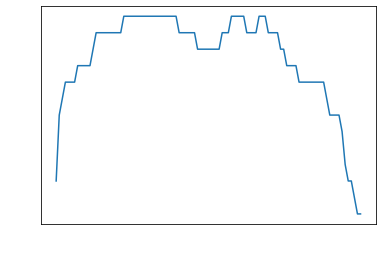

In [199]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [200]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

87.09677419354838
22


In [201]:
model1_1.fit(X, Y)

LogisticRegression(n_jobs=-1, random_state=2021, solver='liblinear')

In [202]:
real_pred3 = (model1_1.predict_proba(test)[:,1] > 0.22).astype(int)

In [203]:
submission['target'] = real_pred3
submission.to_csv('submission3.csv', index=False)

In [204]:
real_pred4 = (model1_1.predict_proba(test)[:,1] > 0.58).astype(int)

In [210]:
np.max(acc_score_array)

87.09677419354838

In [211]:
model2 = svm.SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
model2.fit(train_X, train_Y)

SVC(C=1, gamma=0.1, probability=True)

In [212]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred2 = (model2.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred2)
    print(temp_thres, 'f1_score of rbf-svm is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of rbf-svm is 70.83%
0.01 f1_score of rbf-svm is 70.83%
0.02 f1_score of rbf-svm is 70.83%
0.03 f1_score of rbf-svm is 70.83%
0.04 f1_score of rbf-svm is 70.83%
0.05 f1_score of rbf-svm is 70.83%
0.06 f1_score of rbf-svm is 70.83%
0.07 f1_score of rbf-svm is 70.83%
0.08 f1_score of rbf-svm is 70.83%
0.09 f1_score of rbf-svm is 70.83%
0.1 f1_score of rbf-svm is 70.83%
0.11 f1_score of rbf-svm is 70.83%
0.12 f1_score of rbf-svm is 70.83%
0.13 f1_score of rbf-svm is 70.83%
0.14 f1_score of rbf-svm is 70.83%
0.15 f1_score of rbf-svm is 70.83%
0.16 f1_score of rbf-svm is 70.83%
0.17 f1_score of rbf-svm is 70.83%
0.18 f1_score of rbf-svm is 70.83%
0.19 f1_score of rbf-svm is 70.83%
0.2 f1_score of rbf-svm is 70.83%
0.21 f1_score of rbf-svm is 70.83%
0.22 f1_score of rbf-svm is 70.83%
0.23 f1_score of rbf-svm is 70.83%
0.24 f1_score of rbf-svm is 70.83%
0.25 f1_score of rbf-svm is 70.83%
0.26 f1_score of rbf-svm is 70.83%
0.27 f1_score of rbf-svm is 70.83%
0.28 f1_score of rbf-sv

Text(0, 0.5, 'f1 score')

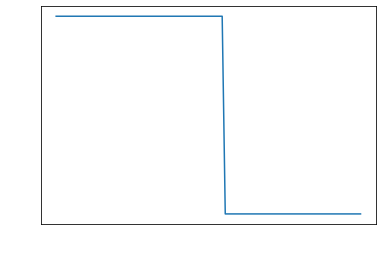

In [213]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [214]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

70.83333333333333
0


In [215]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred2 = (model2.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred2, valid_Y)
    print(temp_thres, 'Accuracy of rbf-svm is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of rbf-svm is 54.84%
0.01 Accuracy of rbf-svm is 54.84%
0.02 Accuracy of rbf-svm is 54.84%
0.03 Accuracy of rbf-svm is 54.84%
0.04 Accuracy of rbf-svm is 54.84%
0.05 Accuracy of rbf-svm is 54.84%
0.06 Accuracy of rbf-svm is 54.84%
0.07 Accuracy of rbf-svm is 54.84%
0.08 Accuracy of rbf-svm is 54.84%
0.09 Accuracy of rbf-svm is 54.84%
0.1 Accuracy of rbf-svm is 54.84%
0.11 Accuracy of rbf-svm is 54.84%
0.12 Accuracy of rbf-svm is 54.84%
0.13 Accuracy of rbf-svm is 54.84%
0.14 Accuracy of rbf-svm is 54.84%
0.15 Accuracy of rbf-svm is 54.84%
0.16 Accuracy of rbf-svm is 54.84%
0.17 Accuracy of rbf-svm is 54.84%
0.18 Accuracy of rbf-svm is 54.84%
0.19 Accuracy of rbf-svm is 54.84%
0.2 Accuracy of rbf-svm is 54.84%
0.21 Accuracy of rbf-svm is 54.84%
0.22 Accuracy of rbf-svm is 54.84%
0.23 Accuracy of rbf-svm is 54.84%
0.24 Accuracy of rbf-svm is 54.84%
0.25 Accuracy of rbf-svm is 54.84%
0.26 Accuracy of rbf-svm is 54.84%
0.27 Accuracy of rbf-svm is 54.84%
0.28 Accuracy of rbf-sv

Text(0, 0.5, 'accuracy score')

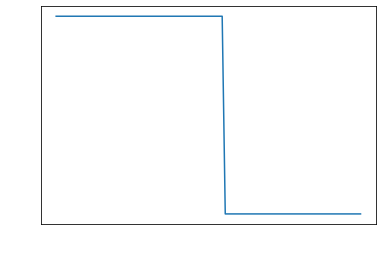

In [216]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [217]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

54.83870967741935
0


In [218]:
model3 = GaussianNB()
model3.fit(train_X, train_Y)

GaussianNB()

In [219]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred3 = (model3.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred3)
    print(temp_thres, 'f1_score of GNB is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of GNB is 70.83%
0.01 f1_score of GNB is 80.00%
0.02 f1_score of GNB is 80.00%
0.03 f1_score of GNB is 78.95%
0.04 f1_score of GNB is 78.95%
0.05 f1_score of GNB is 77.78%
0.06 f1_score of GNB is 77.78%
0.07 f1_score of GNB is 82.35%
0.08 f1_score of GNB is 78.79%
0.09 f1_score of GNB is 78.79%
0.1 f1_score of GNB is 78.79%
0.11 f1_score of GNB is 78.79%
0.12 f1_score of GNB is 75.00%
0.13 f1_score of GNB is 75.00%
0.14 f1_score of GNB is 75.00%
0.15 f1_score of GNB is 75.00%
0.16 f1_score of GNB is 75.00%
0.17 f1_score of GNB is 75.00%
0.18 f1_score of GNB is 75.00%
0.19 f1_score of GNB is 77.42%
0.2 f1_score of GNB is 77.42%
0.21 f1_score of GNB is 77.42%
0.22 f1_score of GNB is 77.42%
0.23 f1_score of GNB is 77.42%
0.24 f1_score of GNB is 77.42%
0.25 f1_score of GNB is 73.33%
0.26 f1_score of GNB is 73.33%
0.27 f1_score of GNB is 73.33%
0.28 f1_score of GNB is 73.33%
0.29 f1_score of GNB is 73.33%
0.3 f1_score of GNB is 73.33%
0.31 f1_score of GNB is 73.33%
0.32 f1_scor

Text(0, 0.5, 'f1 score')

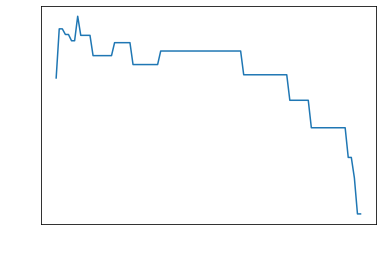

In [220]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [221]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

82.35294117647058
7


In [222]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred3 = (model3.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred3, valid_Y)
    print(temp_thres, 'Accuracy of GNB is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of GNB is 54.84%
0.01 Accuracy of GNB is 74.19%
0.02 Accuracy of GNB is 74.19%
0.03 Accuracy of GNB is 74.19%
0.04 Accuracy of GNB is 74.19%
0.05 Accuracy of GNB is 74.19%
0.06 Accuracy of GNB is 74.19%
0.07 Accuracy of GNB is 80.65%
0.08 Accuracy of GNB is 77.42%
0.09 Accuracy of GNB is 77.42%
0.1 Accuracy of GNB is 77.42%
0.11 Accuracy of GNB is 77.42%
0.12 Accuracy of GNB is 74.19%
0.13 Accuracy of GNB is 74.19%
0.14 Accuracy of GNB is 74.19%
0.15 Accuracy of GNB is 74.19%
0.16 Accuracy of GNB is 74.19%
0.17 Accuracy of GNB is 74.19%
0.18 Accuracy of GNB is 74.19%
0.19 Accuracy of GNB is 77.42%
0.2 Accuracy of GNB is 77.42%
0.21 Accuracy of GNB is 77.42%
0.22 Accuracy of GNB is 77.42%
0.23 Accuracy of GNB is 77.42%
0.24 Accuracy of GNB is 77.42%
0.25 Accuracy of GNB is 74.19%
0.26 Accuracy of GNB is 74.19%
0.27 Accuracy of GNB is 74.19%
0.28 Accuracy of GNB is 74.19%
0.29 Accuracy of GNB is 74.19%
0.3 Accuracy of GNB is 74.19%
0.31 Accuracy of GNB is 74.19%
0.32 Accurac

Text(0, 0.5, 'accuracy score')

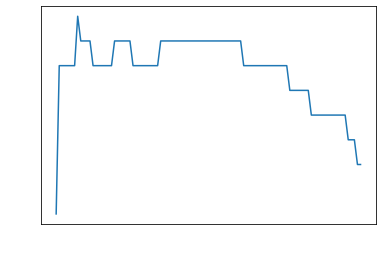

In [223]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [224]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

80.64516129032258
7


In [225]:
model4 = RandomForestClassifier(n_estimators=200)
model4.fit(train_X, train_Y)

RandomForestClassifier(n_estimators=200)

In [226]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred4 = (model4.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred4)
    print(temp_thres, 'f1_score of RF is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of RF is 70.83%
0.01 f1_score of RF is 70.83%
0.02 f1_score of RF is 72.34%
0.03 f1_score of RF is 72.34%
0.04 f1_score of RF is 73.91%
0.05 f1_score of RF is 73.91%
0.06 f1_score of RF is 73.91%
0.07 f1_score of RF is 77.27%
0.08 f1_score of RF is 77.27%
0.09 f1_score of RF is 77.27%
0.1 f1_score of RF is 79.07%
0.11 f1_score of RF is 79.07%
0.12 f1_score of RF is 80.95%
0.13 f1_score of RF is 80.95%
0.14 f1_score of RF is 80.95%
0.15 f1_score of RF is 80.95%
0.16 f1_score of RF is 80.95%
0.17 f1_score of RF is 82.93%
0.18 f1_score of RF is 82.93%
0.19 f1_score of RF is 82.93%
0.2 f1_score of RF is 85.00%
0.21 f1_score of RF is 85.00%
0.22 f1_score of RF is 85.00%
0.23 f1_score of RF is 85.00%
0.24 f1_score of RF is 85.00%
0.25 f1_score of RF is 87.18%
0.26 f1_score of RF is 89.47%
0.27 f1_score of RF is 89.47%
0.28 f1_score of RF is 89.47%
0.29 f1_score of RF is 89.47%
0.3 f1_score of RF is 89.47%
0.31 f1_score of RF is 89.47%
0.32 f1_score of RF is 89.47%
0.33 f1_score 

Text(0, 0.5, 'f1 score')

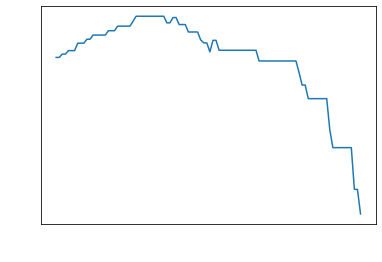

In [227]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [228]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

89.47368421052632
26


In [229]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred4 = (model4.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred4, valid_Y)
    print(temp_thres, 'Accuracy of RF is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of RF is 54.84%
0.01 Accuracy of RF is 54.84%
0.02 Accuracy of RF is 58.06%
0.03 Accuracy of RF is 58.06%
0.04 Accuracy of RF is 61.29%
0.05 Accuracy of RF is 61.29%
0.06 Accuracy of RF is 61.29%
0.07 Accuracy of RF is 67.74%
0.08 Accuracy of RF is 67.74%
0.09 Accuracy of RF is 67.74%
0.1 Accuracy of RF is 70.97%
0.11 Accuracy of RF is 70.97%
0.12 Accuracy of RF is 74.19%
0.13 Accuracy of RF is 74.19%
0.14 Accuracy of RF is 74.19%
0.15 Accuracy of RF is 74.19%
0.16 Accuracy of RF is 74.19%
0.17 Accuracy of RF is 77.42%
0.18 Accuracy of RF is 77.42%
0.19 Accuracy of RF is 77.42%
0.2 Accuracy of RF is 80.65%
0.21 Accuracy of RF is 80.65%
0.22 Accuracy of RF is 80.65%
0.23 Accuracy of RF is 80.65%
0.24 Accuracy of RF is 80.65%
0.25 Accuracy of RF is 83.87%
0.26 Accuracy of RF is 87.10%
0.27 Accuracy of RF is 87.10%
0.28 Accuracy of RF is 87.10%
0.29 Accuracy of RF is 87.10%
0.3 Accuracy of RF is 87.10%
0.31 Accuracy of RF is 87.10%
0.32 Accuracy of RF is 87.10%
0.33 Accuracy 

Text(0, 0.5, 'accuracy score')

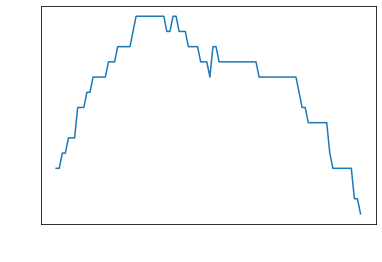

In [230]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [231]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

87.09677419354838
26


In [232]:
model4.fit(X, Y)

RandomForestClassifier(n_estimators=200)

In [233]:
real_pred2 = (model4.predict_proba(test)[:,1] > 0.34).astype(int)

In [234]:
submission['target'] = real_pred2
submission.to_csv('submission2.csv', index=False)

In [235]:
from sklearn.ensemble import VotingClassifier

In [236]:
eclf1 = VotingClassifier(estimators=[('rf', model4), ('logistic2', model1_1)],
                         voting='soft')
eclf1 = eclf1.fit(X,Y)

In [237]:
real_pred5 = eclf1.predict(test)

In [238]:
submission['target'] = real_pred5
submission.to_csv('submission5.csv', index=False)

In [241]:
import lightgbm as lgbm
eclf2 = lgbm.LGBMClassifier()
eclf2.fit(X,Y)

LGBMClassifier()

In [242]:
real_pred6 = eclf2.predict(test)

In [243]:
submission['target'] = real_pred6
submission.to_csv('submission6.csv', index=False)

In [244]:
from sklearn.ensemble import StackingClassifier

In [245]:
eclf3 = StackingClassifier(estimators=[('rf', model4), ('lgbm', eclf2)], 
                           final_estimator=model1_1,
                           n_jobs=-1,
                           stack_method='predict',
                           cv=5)

In [246]:
eclf3.fit(train_X, train_Y)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                               ('lgbm', LGBMClassifier())],
                   final_estimator=LogisticRegression(n_jobs=-1,
                                                      random_state=2021,
                                                      solver='liblinear'),
                   n_jobs=-1, stack_method='predict')

In [247]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred5 = (eclf3.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred5)
    print(temp_thres, 'f1_score of Stacking is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of Stacking is 70.83%
0.01 f1_score of Stacking is 70.83%
0.02 f1_score of Stacking is 70.83%
0.03 f1_score of Stacking is 70.83%
0.04 f1_score of Stacking is 70.83%
0.05 f1_score of Stacking is 70.83%
0.06 f1_score of Stacking is 70.83%
0.07 f1_score of Stacking is 70.83%
0.08 f1_score of Stacking is 70.83%
0.09 f1_score of Stacking is 70.83%
0.1 f1_score of Stacking is 70.83%
0.11 f1_score of Stacking is 70.83%
0.12 f1_score of Stacking is 70.83%
0.13 f1_score of Stacking is 70.83%
0.14 f1_score of Stacking is 70.83%
0.15 f1_score of Stacking is 70.83%
0.16 f1_score of Stacking is 70.83%
0.17 f1_score of Stacking is 70.83%
0.18 f1_score of Stacking is 70.83%
0.19 f1_score of Stacking is 70.83%
0.2 f1_score of Stacking is 70.83%
0.21 f1_score of Stacking is 70.83%
0.22 f1_score of Stacking is 70.83%
0.23 f1_score of Stacking is 70.83%
0.24 f1_score of Stacking is 70.83%
0.25 f1_score of Stacking is 91.43%
0.26 f1_score of Stacking is 91.43%
0.27 f1_score of Stacking is 91

Text(0, 0.5, 'f1 score')

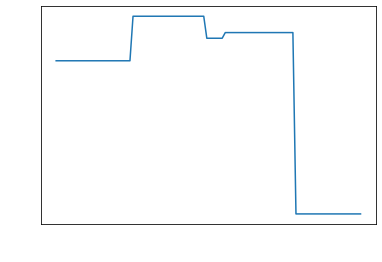

In [248]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [249]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

91.42857142857143
25


In [250]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred5 = (eclf3.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred5, valid_Y)
    print(temp_thres, 'Accuracy of Stacking is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of Stacking is 54.84%
0.01 Accuracy of Stacking is 54.84%
0.02 Accuracy of Stacking is 54.84%
0.03 Accuracy of Stacking is 54.84%
0.04 Accuracy of Stacking is 54.84%
0.05 Accuracy of Stacking is 54.84%
0.06 Accuracy of Stacking is 54.84%
0.07 Accuracy of Stacking is 54.84%
0.08 Accuracy of Stacking is 54.84%
0.09 Accuracy of Stacking is 54.84%
0.1 Accuracy of Stacking is 54.84%
0.11 Accuracy of Stacking is 54.84%
0.12 Accuracy of Stacking is 54.84%
0.13 Accuracy of Stacking is 54.84%
0.14 Accuracy of Stacking is 54.84%
0.15 Accuracy of Stacking is 54.84%
0.16 Accuracy of Stacking is 54.84%
0.17 Accuracy of Stacking is 54.84%
0.18 Accuracy of Stacking is 54.84%
0.19 Accuracy of Stacking is 54.84%
0.2 Accuracy of Stacking is 54.84%
0.21 Accuracy of Stacking is 54.84%
0.22 Accuracy of Stacking is 54.84%
0.23 Accuracy of Stacking is 54.84%
0.24 Accuracy of Stacking is 54.84%
0.25 Accuracy of Stacking is 90.32%
0.26 Accuracy of Stacking is 90.32%
0.27 Accuracy of Stacking is 90

Text(0, 0.5, 'accuracy score')

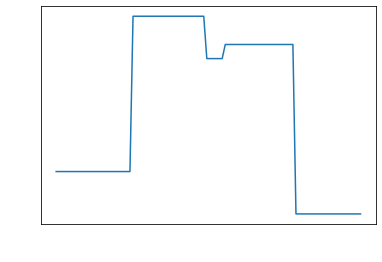

In [251]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [252]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

90.32258064516128
25


In [253]:
eclf3 = eclf3.fit(X,Y)

In [254]:
real_pred7 = (eclf3.predict_proba(test)[:,1] > 0.23).astype(int)

In [255]:
submission['target'] = real_pred7
submission.to_csv('submission7.csv', index=False)